In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **IMPORTING DATASET AND PREPROCESSING THE DATA**

In [140]:
df=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.shape

(93579, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93579 entries, 0 to 93578
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       93579 non-null  float64
 1   HighBP                93579 non-null  float64
 2   HighChol              93579 non-null  float64
 3   CholCheck             93579 non-null  float64
 4   BMI                   93579 non-null  float64
 5   Smoker                93579 non-null  float64
 6   Stroke                93579 non-null  float64
 7   HeartDiseaseorAttack  93579 non-null  float64
 8   PhysActivity          93579 non-null  float64
 9   Fruits                93579 non-null  float64
 10  Veggies               93579 non-null  float64
 11  HvyAlcoholConsump     93579 non-null  float64
 12  AnyHealthcare         93579 non-null  float64
 13  NoDocbcCost           93579 non-null  float64
 14  GenHlth               93579 non-null  float64
 15  MentHlth           

In [5]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,...,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93579.000000,93578.000000,93578.000000,93578.000000,93578.000000
mean,0.139305,0.432512,0.429936,0.962855,28.467103,0.446382,0.041462,0.093792,0.761977,0.635110,...,0.948909,0.083726,2.509772,3.177219,4.263895,0.167452,0.439815,8.074729,5.069771,6.076589
std,0.346266,0.495427,0.495069,0.189118,7.265263,0.497119,0.199358,0.291541,0.425876,0.481402,...,0.220184,0.276978,1.071738,7.361555,8.705830,0.373381,0.496367,3.053800,0.987550,2.066300
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

In [8]:
bin_col=["PhysActivity",
"Fruits",
"Veggies",
"HvyAlcoholConsump",
"AnyHealthcare",
"NoDocbcCost",
"DiffWalk",
"Sex"
]
val_col=["GenHlth","Age","MentHlth",
"PhysHlth",
"Education",
"Income"]

In [141]:
for i in bin_col:
  df[i]=df[i].fillna(df[i].mode()[0])
for i in val_col:
  df[i]=df[i].fillna(df[i].mean())

In [10]:
df.isnull().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

## **VISUALIZING THE DATA**

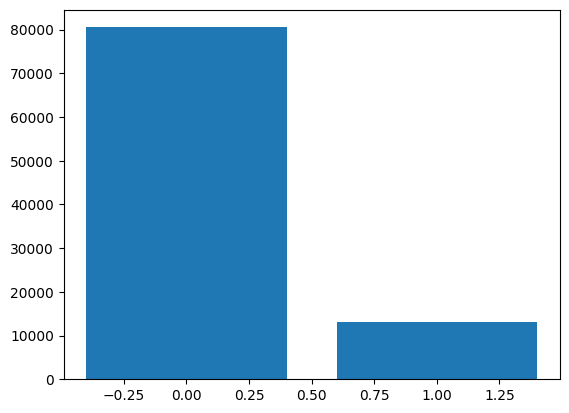

In [11]:
a=df['Diabetes_binary'],value_counts().index
plt.bar(a,df['Diabetes_binary'],value_counts().index)
plt.show()

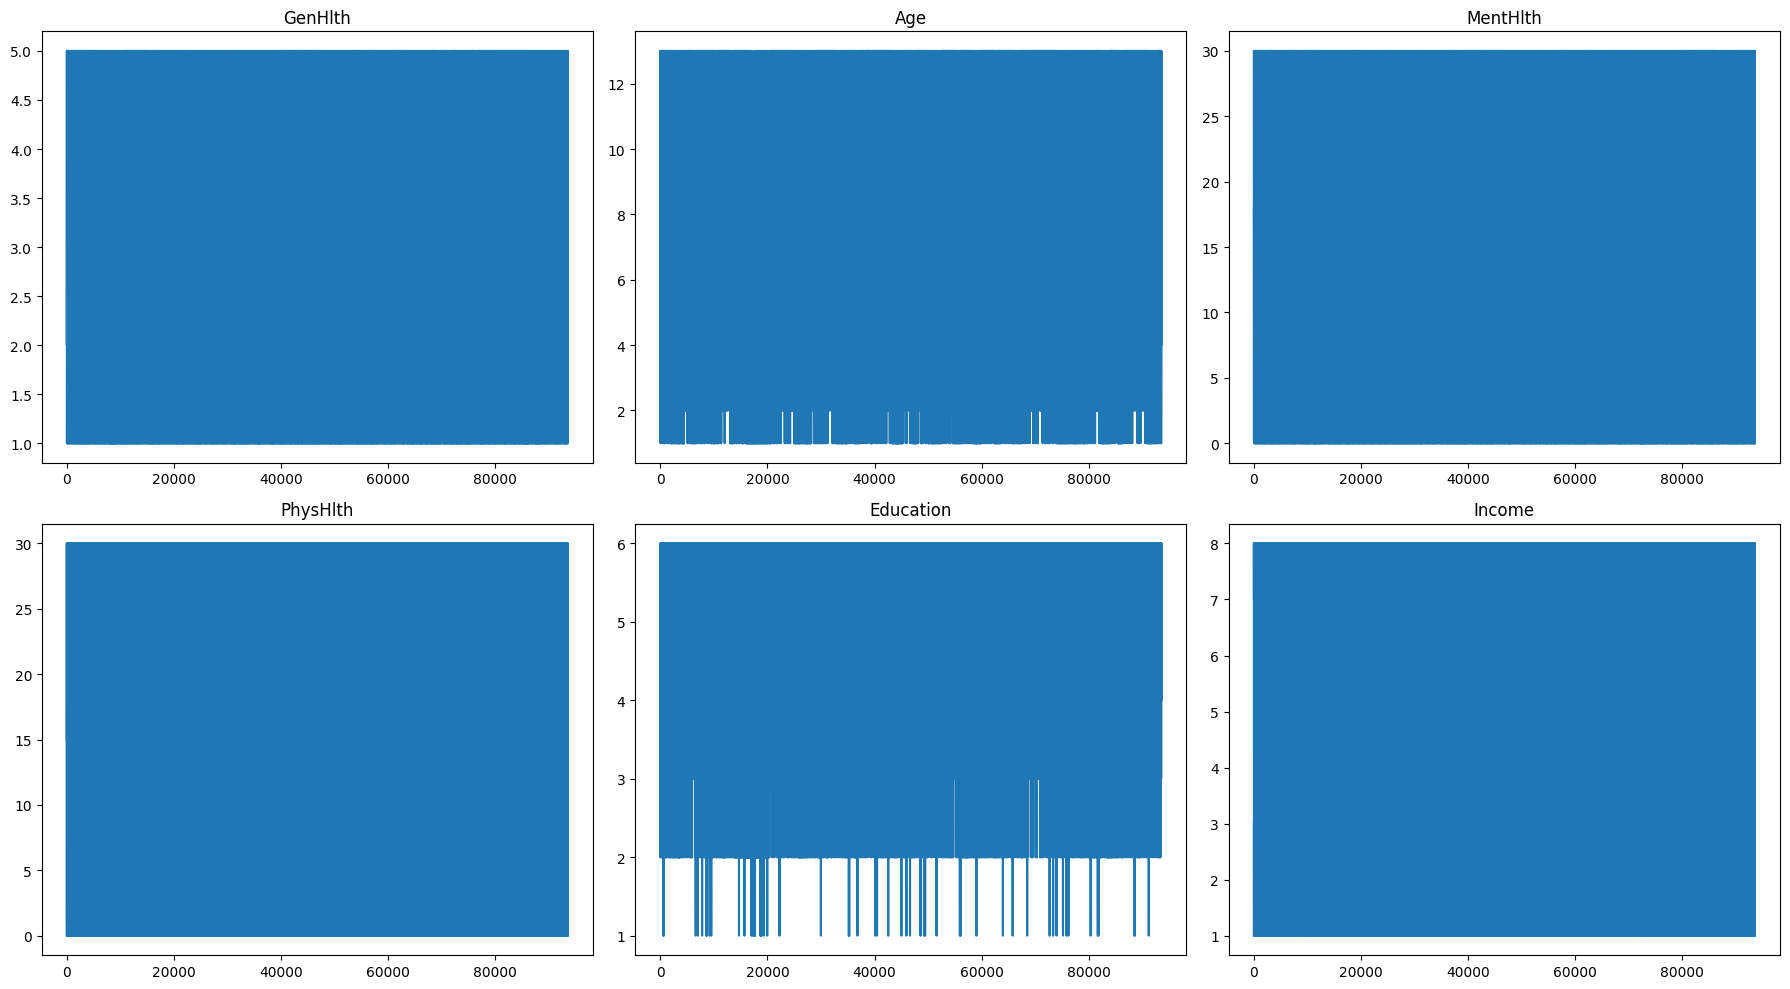

In [12]:
fig,ax=plt.subplots(2,3,figsize=(18,10))
for i, column in enumerate(val_col):
    row_index = i // 3
    col_index = i % 3
    current_ax = ax[row_index, col_index]
    ax[row_index][col_index].plot(df[column])
    current_ax.set_title(column)
plt.tight_layout()
plt.show()

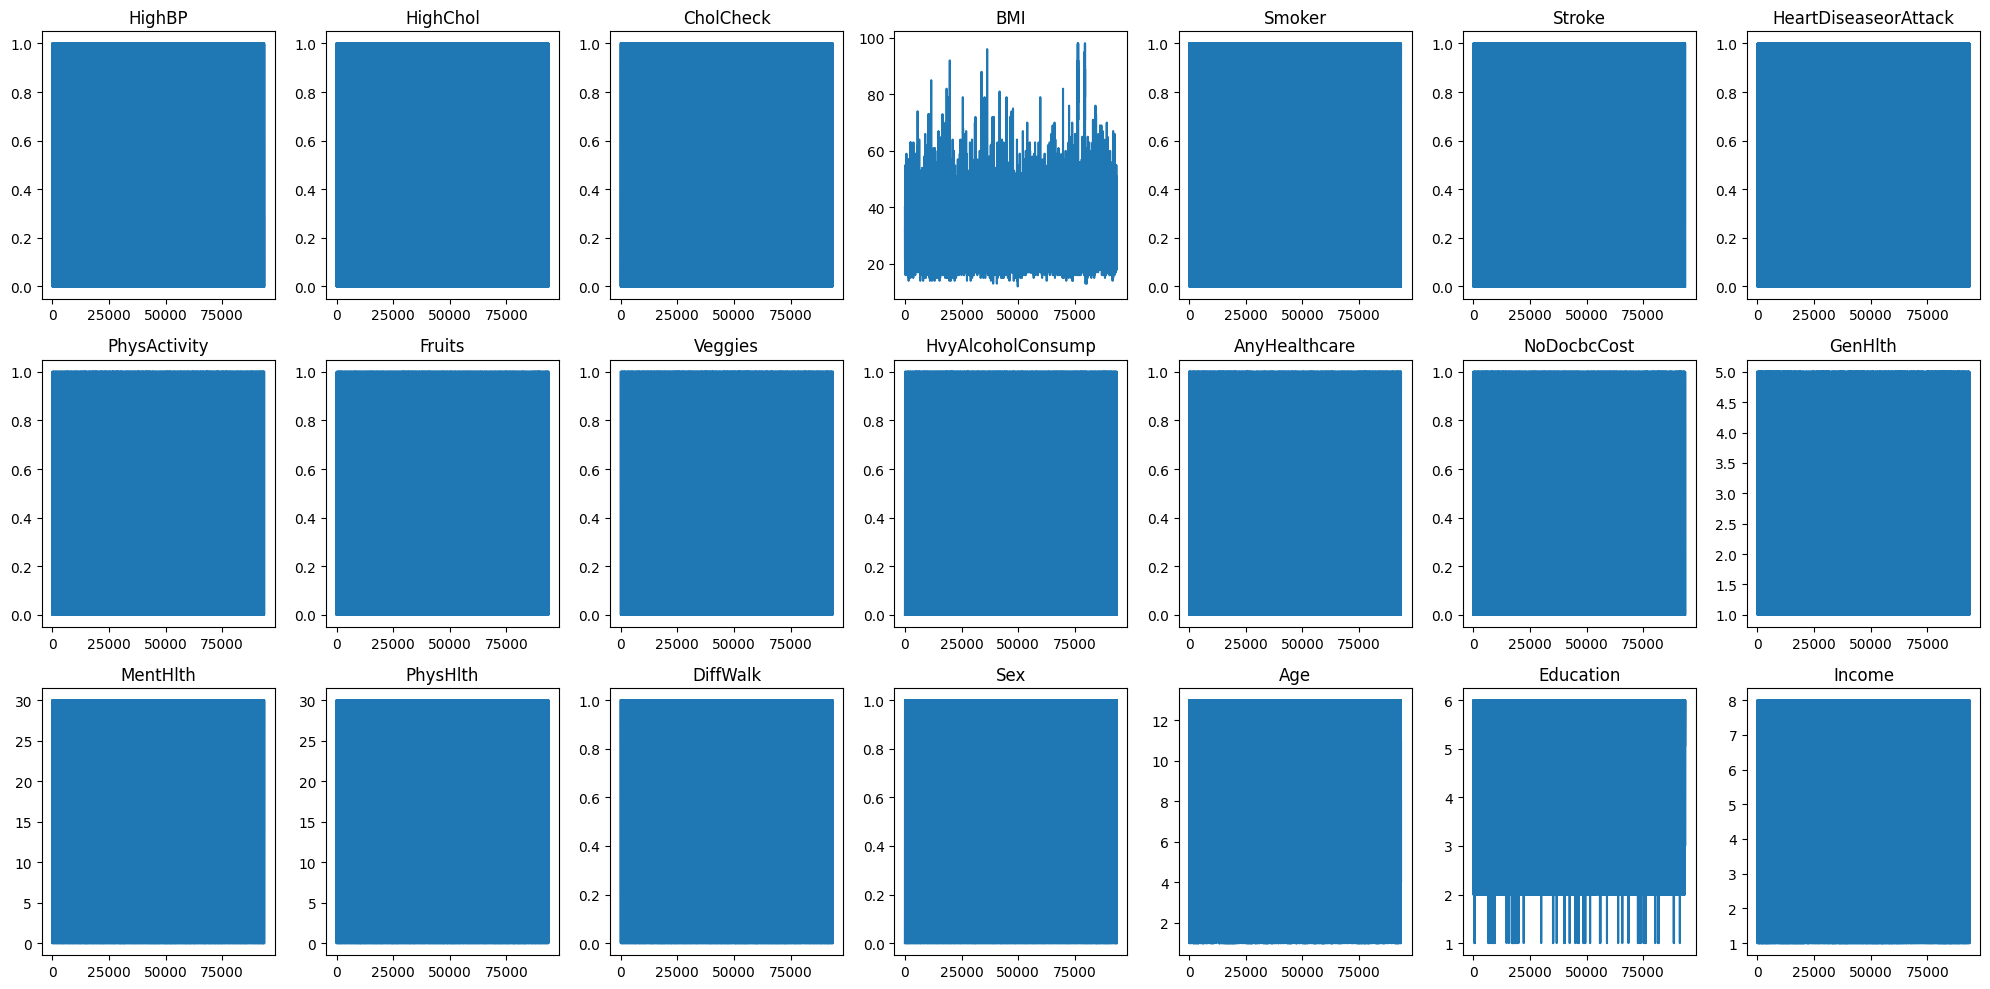

In [13]:
X=df.drop("Diabetes_binary",axis=1)
y=df['Diabetes_binary']
colum=X.columns
fig,ax=plt.subplots(3,7,figsize=(20,10))
for i, column in enumerate(colum):
    row_index = i // 7
    col_index = i % 7
    current_ax = ax[row_index, col_index]
    ax[row_index][col_index].plot(df[column])
    current_ax.set_title(column)
plt.tight_layout()
plt.show()

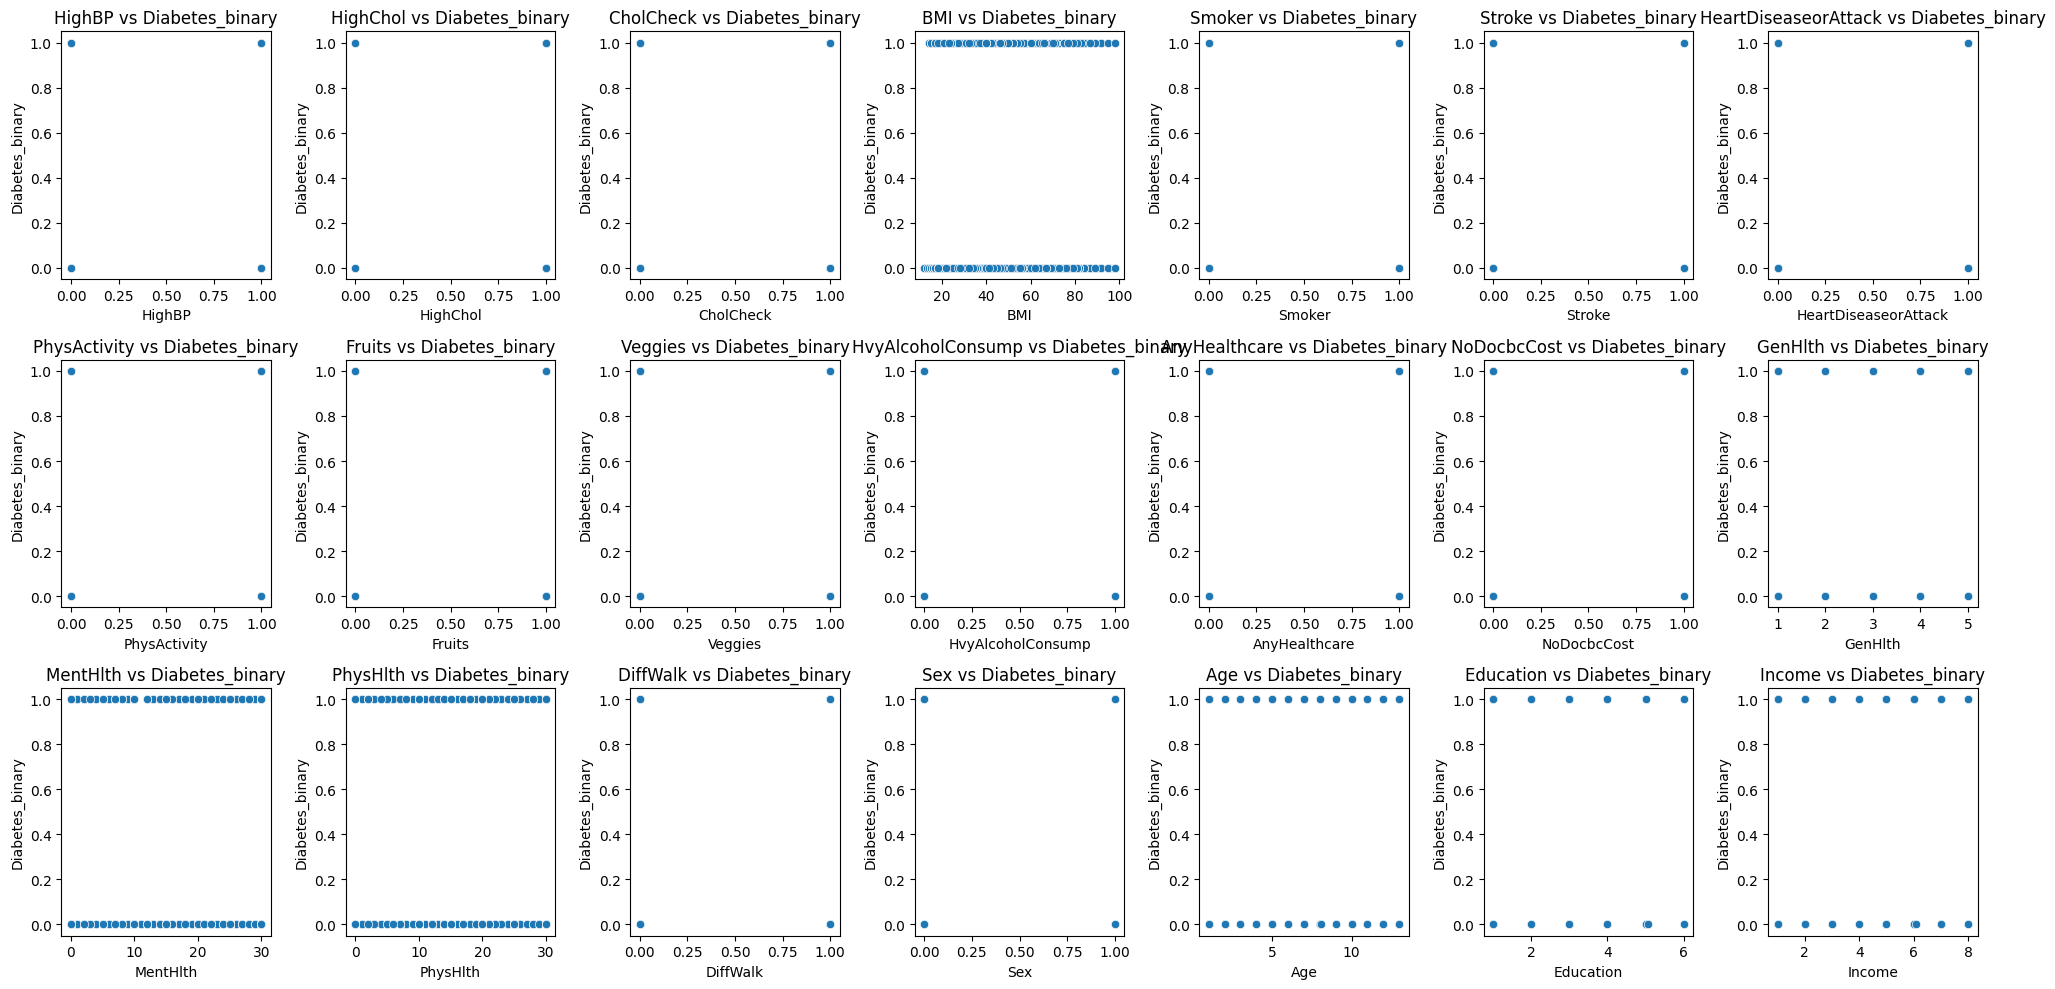

In [14]:
fig, ax = plt.subplots(3, 7, figsize=(20, 10))
colum=X.columns
for i, column in enumerate(colum):
    row_index = i // 7
    col_index = i % 7
    current_ax = ax[row_index, col_index]
    sns.scatterplot(data=df, x=column, y='Diabetes_binary', ax=current_ax)
    current_ax.set_title(f"{column} vs Diabetes_binary")
plt.tight_layout()
plt.show()

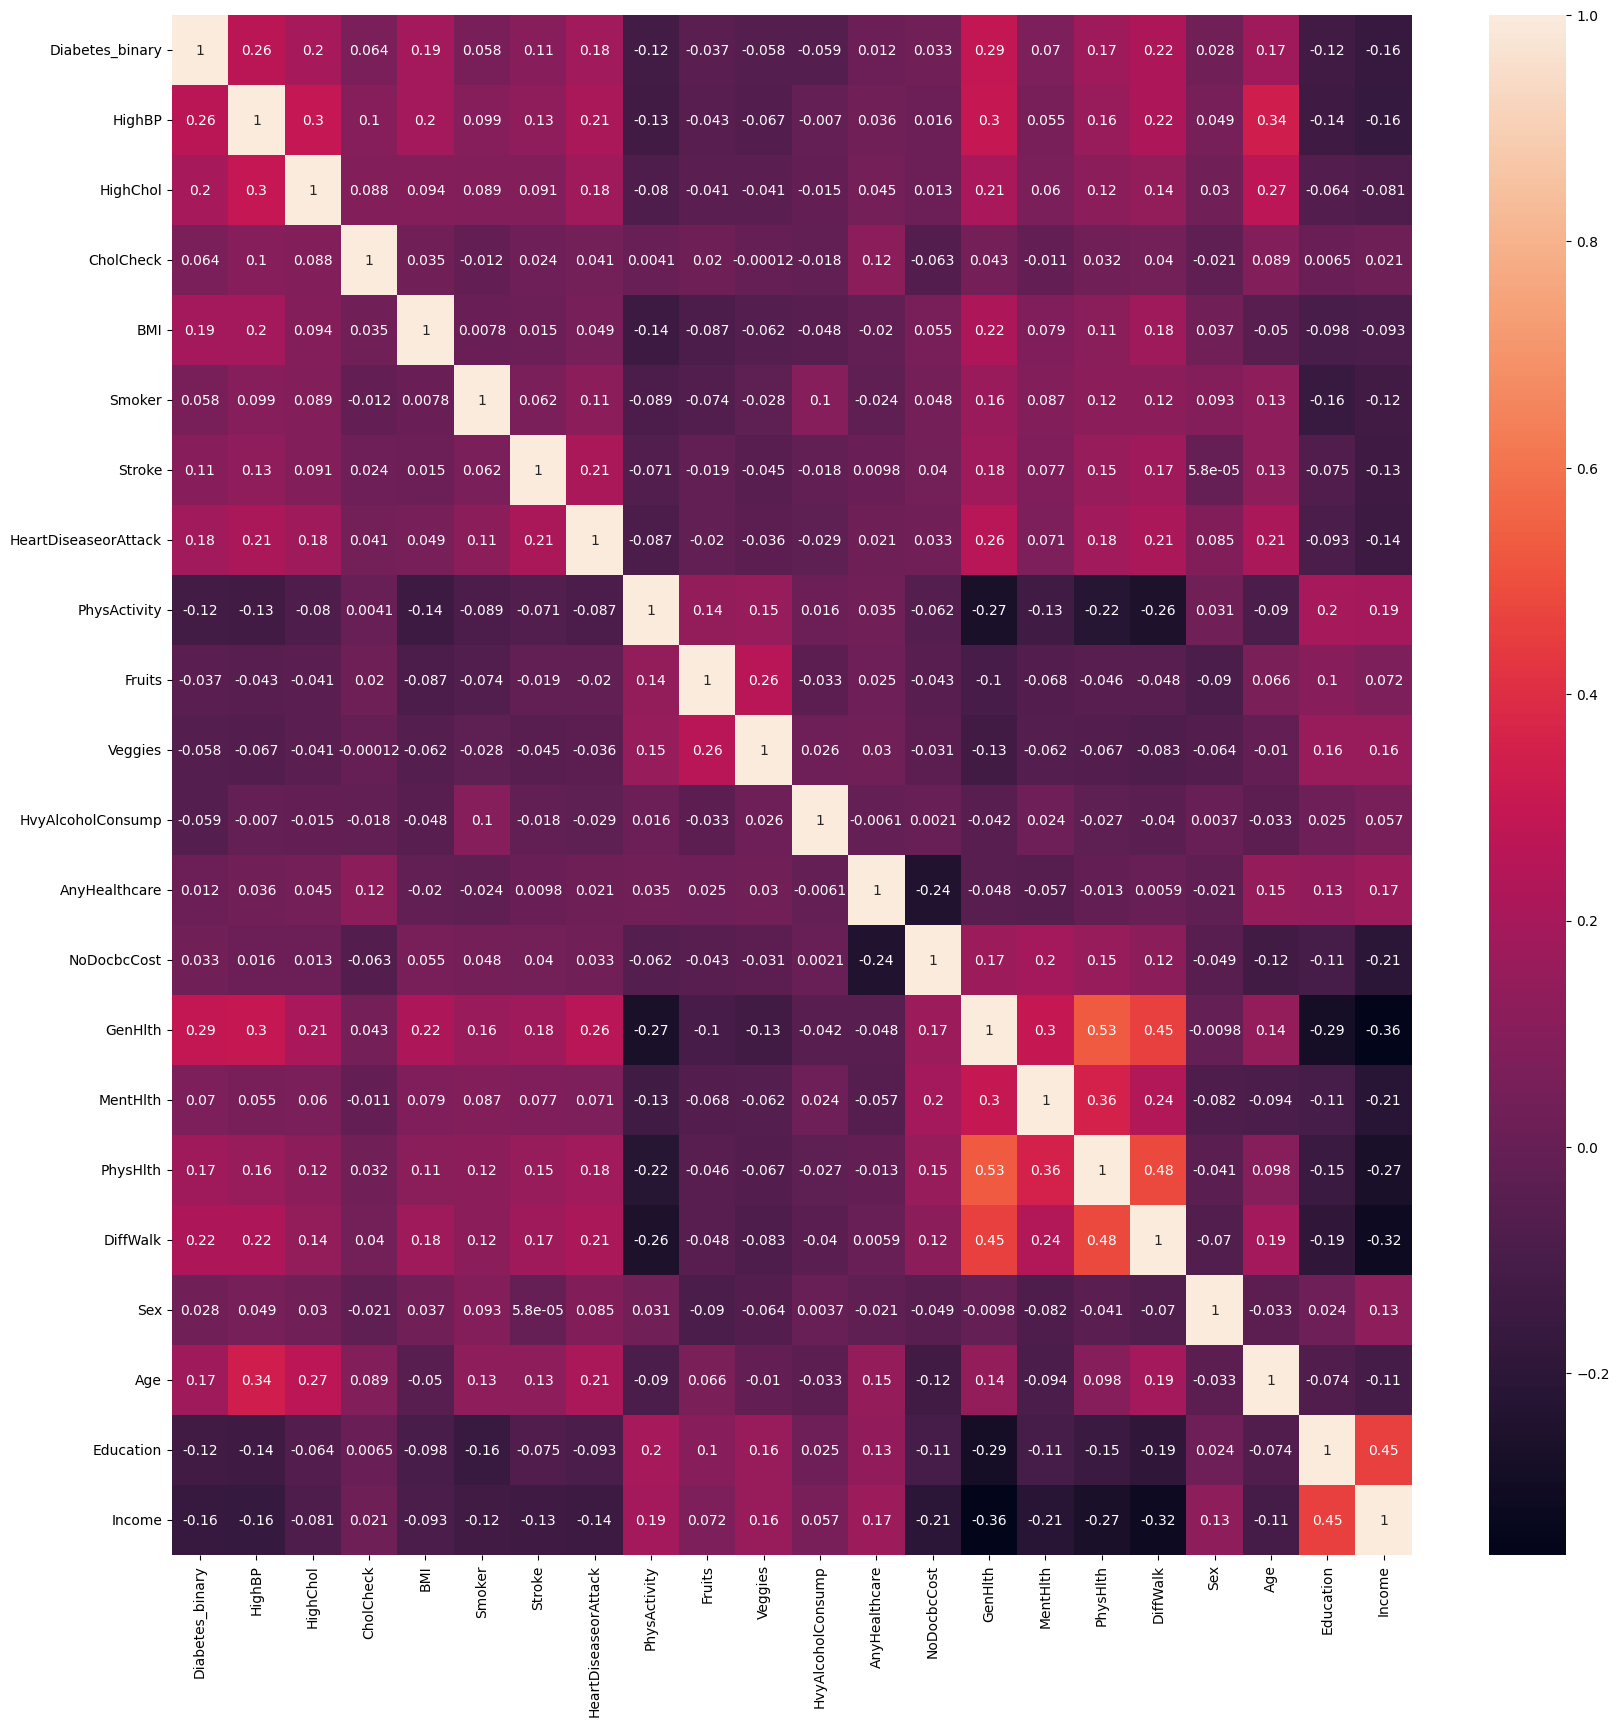

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [40]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [51]:
#df=df.drop(['HighChol','CholCheck', 'BMI','Fruits','HvyAlcoholConsump'],axis=1)

In [52]:
df.shape

(253680, 17)

In [176]:
#BALANCING THE DEPENDENT AND INDEPENDENT VARIABLES
from imblearn.over_sampling import SMOTE
import pandas as pd
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

resampled_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='Diabetes_binary')], axis=1)

In [177]:
resampled_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [178]:
df=resampled_df.copy()

In [170]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [179]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [172]:
#CHECKING FOR OUTLIERS AND REMOVING IF ANY
def rem_ut(df,col,threshold=1.5):
  cleaned_df=df.copy()
  for column in col:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+threshold*iqr
    lower_limit=q1-threshold*iqr
    cleaned_df=cleaned_df[(cleaned_df[column] >= lower_limit) &(cleaned_df[column] <= lower_limit)]
    return cleaned_df

In [183]:
X=df.drop(['Diabetes_binary'],axis=1)
y=df['Diabetes_binary']

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns =X.columns)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571


# **SPLITTING THE DATASET TO TEST AND TRAIN**

In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [186]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (349334, 21)
x_test shape: (87334, 21)
y_train shape: (349334,)
y_test shape: (87334,)


In [187]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
y_pred_1 = model_1.predict(x_test)
train_pred_1=model_1.predict(x_train)

In [189]:
print("train accuracy",accuracy_score(y_train,train_pred_1))
print("test accuracy",accuracy_score(y_test,y_pred_1))

train accuracy 0.7542466522010454
test accuracy 0.7566468958252227


In [190]:
confusion_matrix(y_test,y_pred_1)

array([[31854, 11919],
       [ 9334, 34227]])

In [191]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(max_depth=6,splitter='best',criterion='entropy')
model_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [192]:
train_pred_2=model_2.predict(x_train)
y_pred_2=model_2.predict(x_test)

In [193]:
print("train accuracy",accuracy_score(y_train,train_pred_2))
print("test accuracy",accuracy_score(y_test,y_pred_2))

train accuracy 0.8096807067162085
test accuracy 0.8108640392058076


In [194]:
confusion_matrix(y_test,y_pred_2)

array([[35365,  8408],
       [ 8110, 35451]])

In [195]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

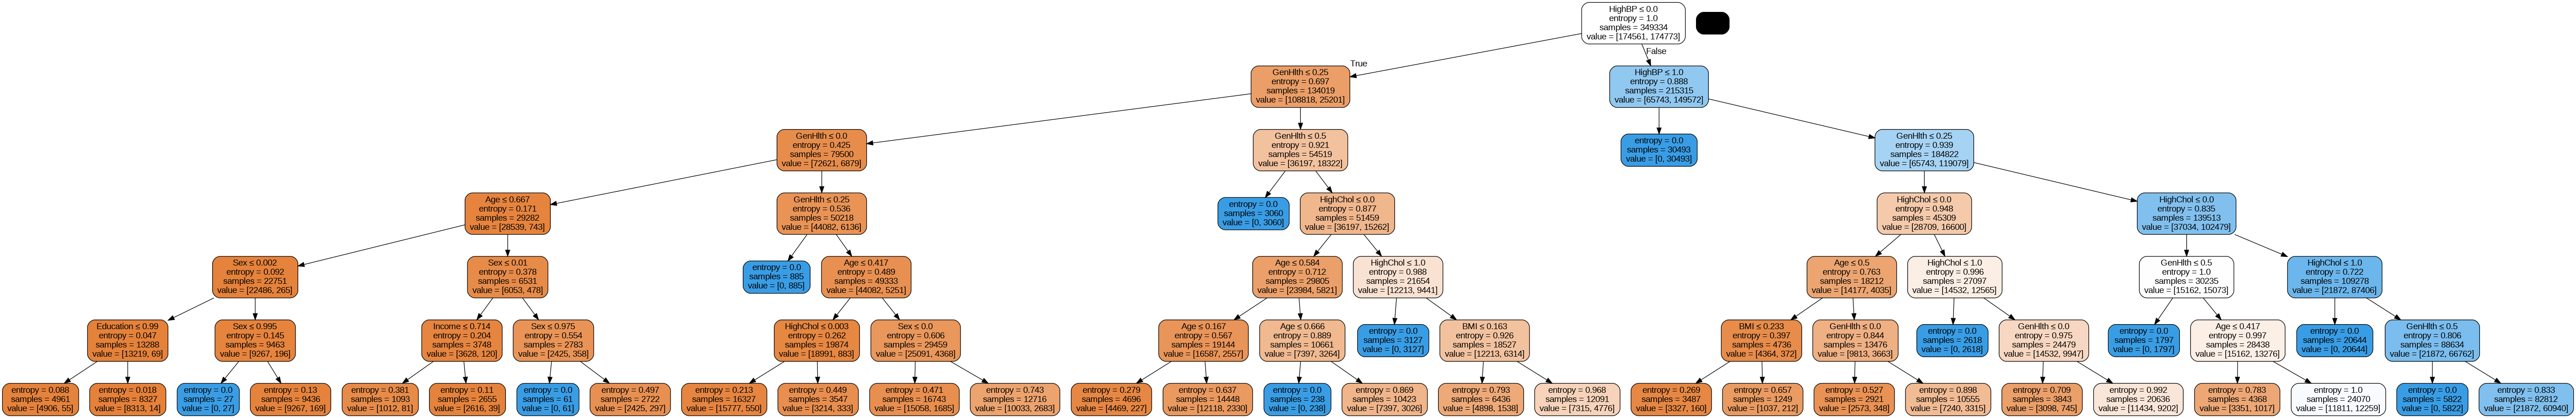

In [196]:
dot_data =StringIO()
export_graphviz(model_2,out_file=dot_data,feature_names= X.columns,
                filled=True,rounded= True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [197]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier(criterion='entropy')

In [200]:
model_3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [201]:
train_pred_3=model_3.predict(x_train)
y_pred_3=model_3.predict(x_test)

In [202]:
print("train accuracy",accuracy_score(y_train,train_pred_2))
print("test accuracy",accuracy_score(y_test,y_pred_2))

train accuracy 0.8096807067162085
test accuracy 0.8108640392058076


In [203]:
confusion_matrix(y_test,y_pred_3)

array([[42080,  1693],
       [ 5282, 38279]])

In [205]:
import pickle
pickle.dump(model_2,open('Diabetes_prediction.pkl','wb'))